In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True,palette='deep')
pd.set_option('display.max_columns',None)

In [31]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Preprocessing Data

In [32]:
df.select_dtypes(include='object').nunique()

,0
gender,3
ever_married,2
work_type,5
Residence_type,2
smoking_status,4


In [33]:
map={0:'No',1:'Yes'}
df['hypertension']=df['hypertension'].map(map)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,No,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,No,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,No,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,No,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,Yes,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [34]:
map={0:'No',1:'Yes'}
df['heart_disease']=df['heart_disease'].map(map)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [35]:
map={0:'No',1:'Yes'}
df['stroke']=df['stroke'].map(map)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
1,51676,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,NaN,never smoked,Yes
2,31112,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,60182,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,1665,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes


# EDA

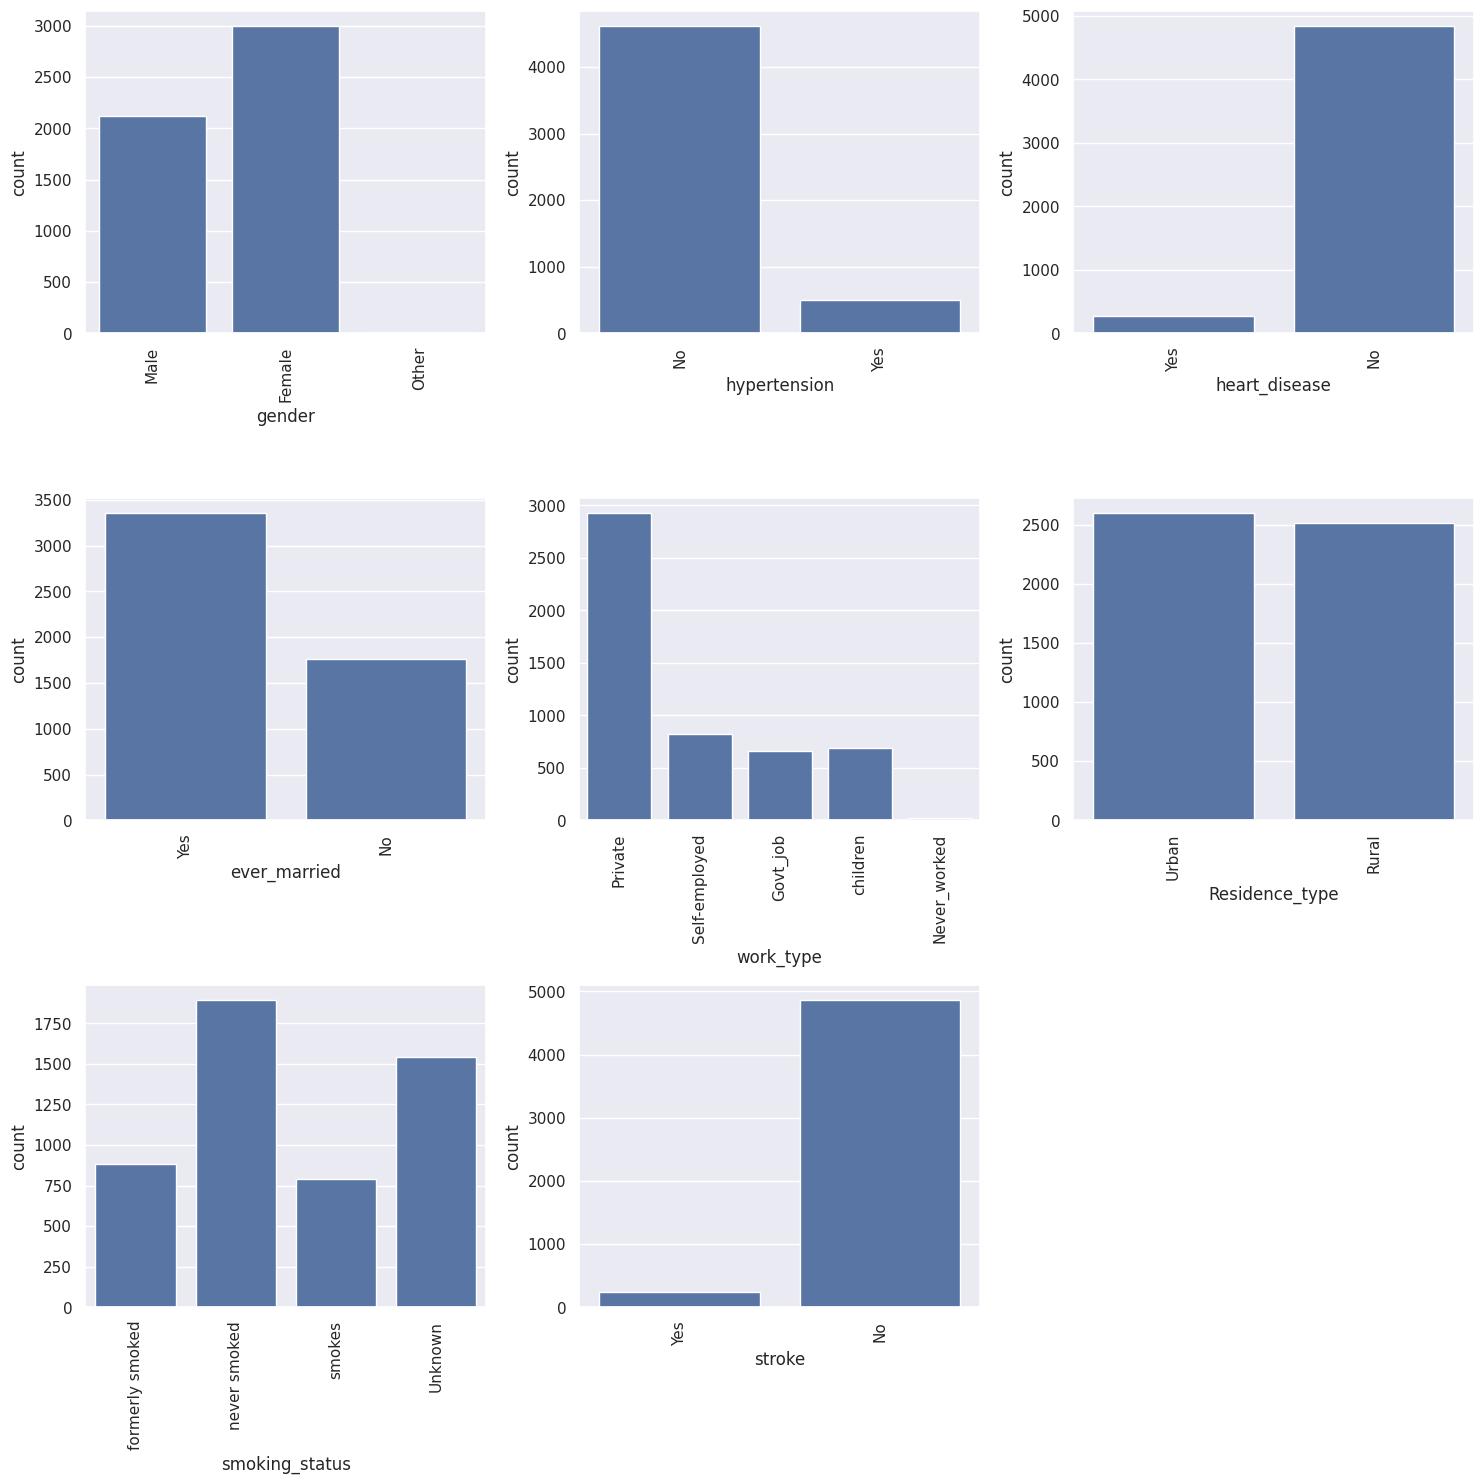

In [36]:
cat_vars=df.select_dtypes(include='object').columns.tolist()

num_cols=len(cat_vars)
num_row=(num_cols + 2)//3
fig,axs=plt.subplots(nrows=num_row,ncols=3,figsize=(15,5*num_row))
axs=axs.flatten()

for i,var in enumerate(cat_vars):
  top_values=df[var].value_counts().index
  filtered_df=df[df[var].isin(top_values)]
  sns.countplot(x=var,data=filtered_df,ax=axs[i])
  axs[i].tick_params(axis='x',rotation=90)

if num_cols < len(axs):
  for i in range(num_cols,len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

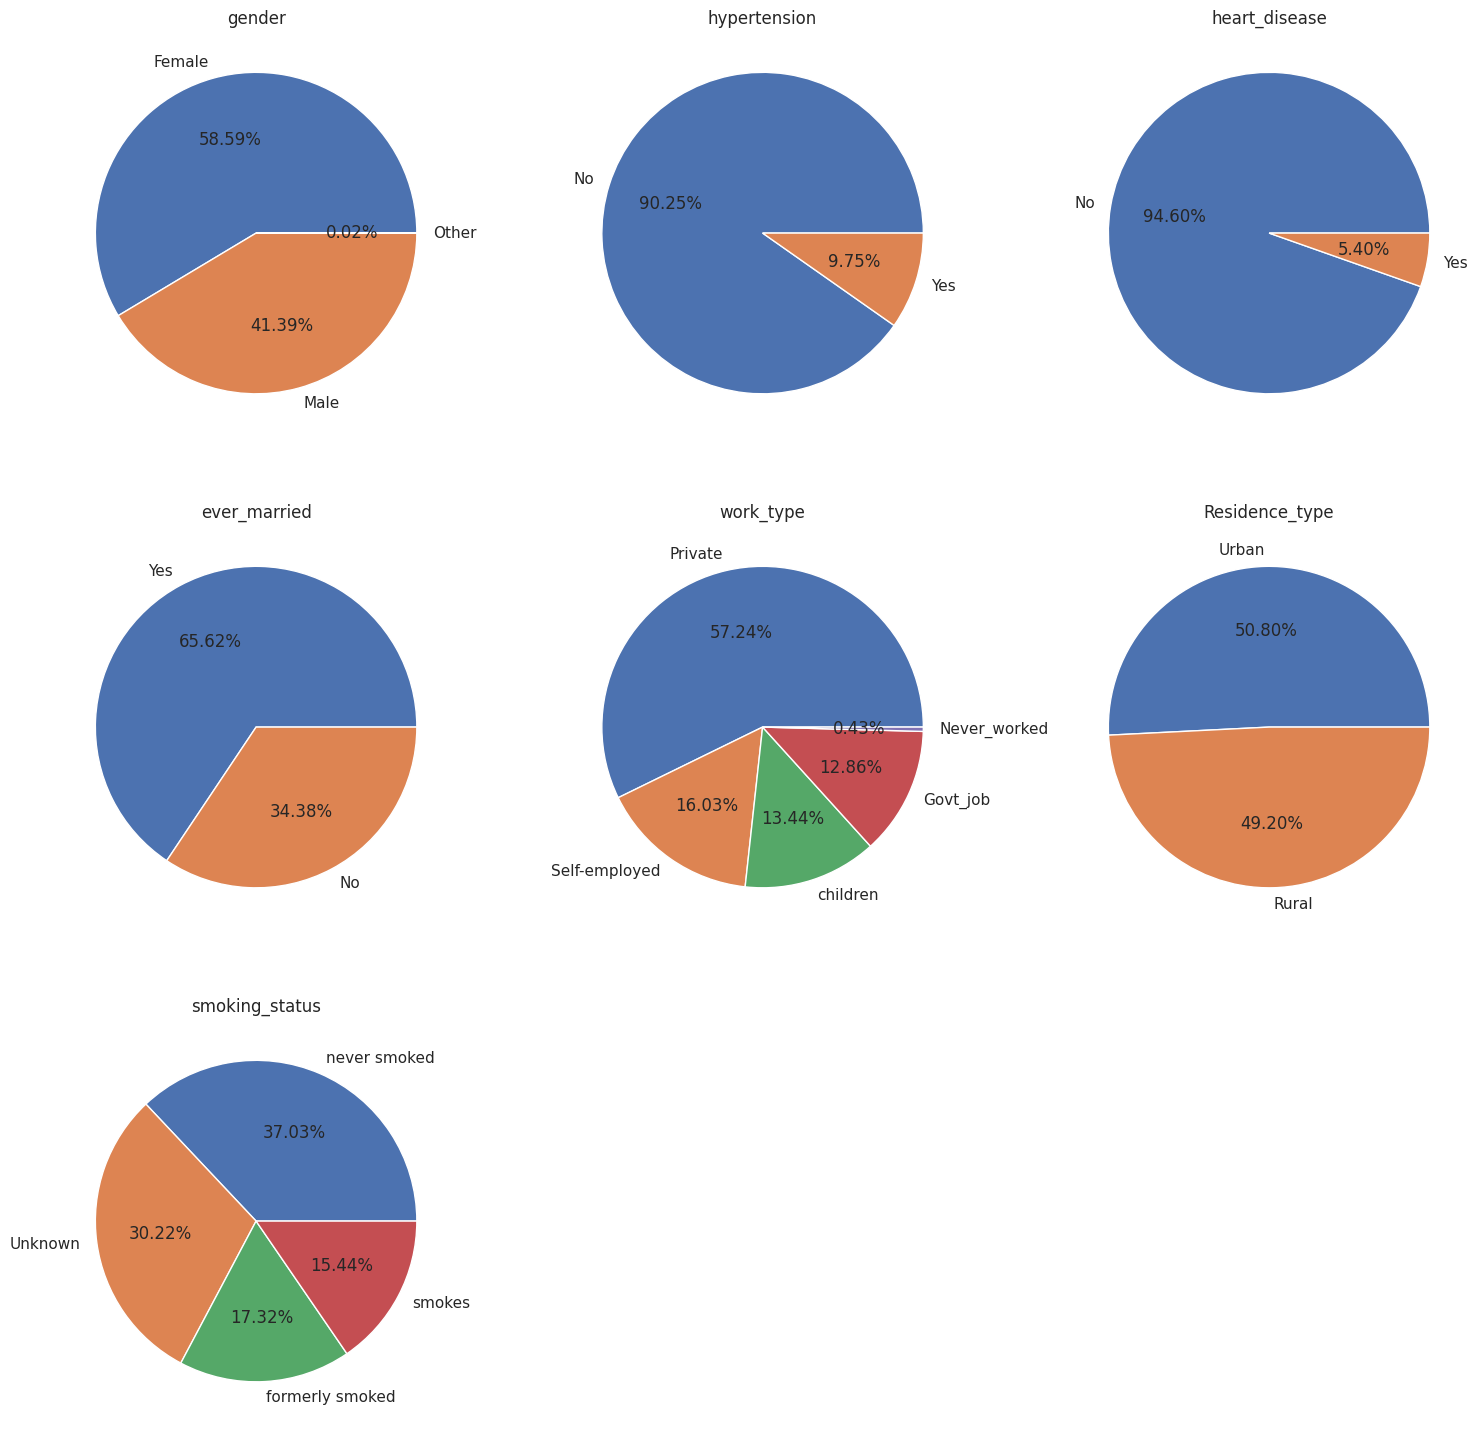

In [37]:
cat_vars=df.select_dtypes(include='object').columns.tolist()
cat_vars.remove('stroke')
max_categories=5

num_cols=len(cat_vars)
num_row=(num_cols + 2)//3
fig,axs=plt.subplots(nrows=num_row,ncols=3,figsize=(15,5*num_row))
axs=axs.flatten()

for i,var in enumerate(cat_vars):
  if i < len(axs):
    cat_counts=df[var].value_counts()

    if len(cat_counts) > max_categories:
      cat_counts_top=cat_counts[:max_categories]
      cat_counts_other=pd.Series(cat_counts[max_categories:])
      cat_counts=pd.concat([cat_counts_top,cat_counts_other])
    axs[i].pie(cat_counts,labels=cat_counts.index,autopct="%1.2f%%")
    axs[i].set_title(var)

if num_cols < len(axs):
  for i in range(num_cols,len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

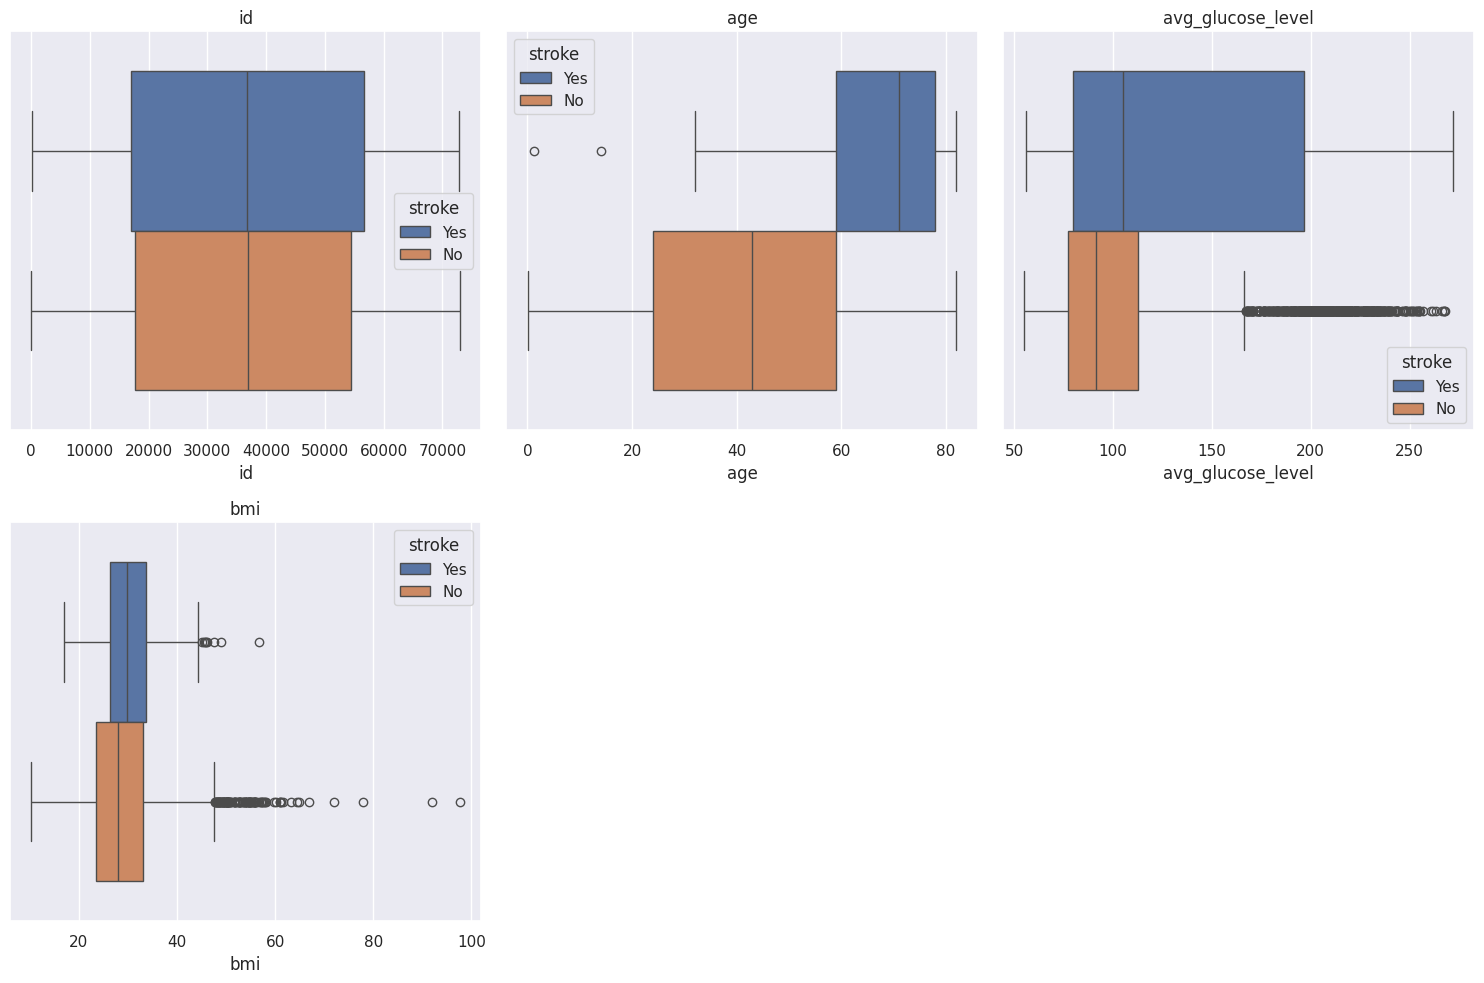

In [38]:
cat_vars=df.select_dtypes(include=['int','float']).columns.tolist()
max_categories=5

num_cols=len(cat_vars)
num_row=(num_cols + 2)//3
fig,axs=plt.subplots(nrows=num_row,ncols=3,figsize=(15,5*num_row))
axs=axs.flatten()

for i,var in enumerate(cat_vars):
  sns.boxplot(x=var,hue='stroke',data=df,ax=axs[i])
  axs[i].set_title(var)

if num_cols < len(axs):
  for i in range(num_cols,len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

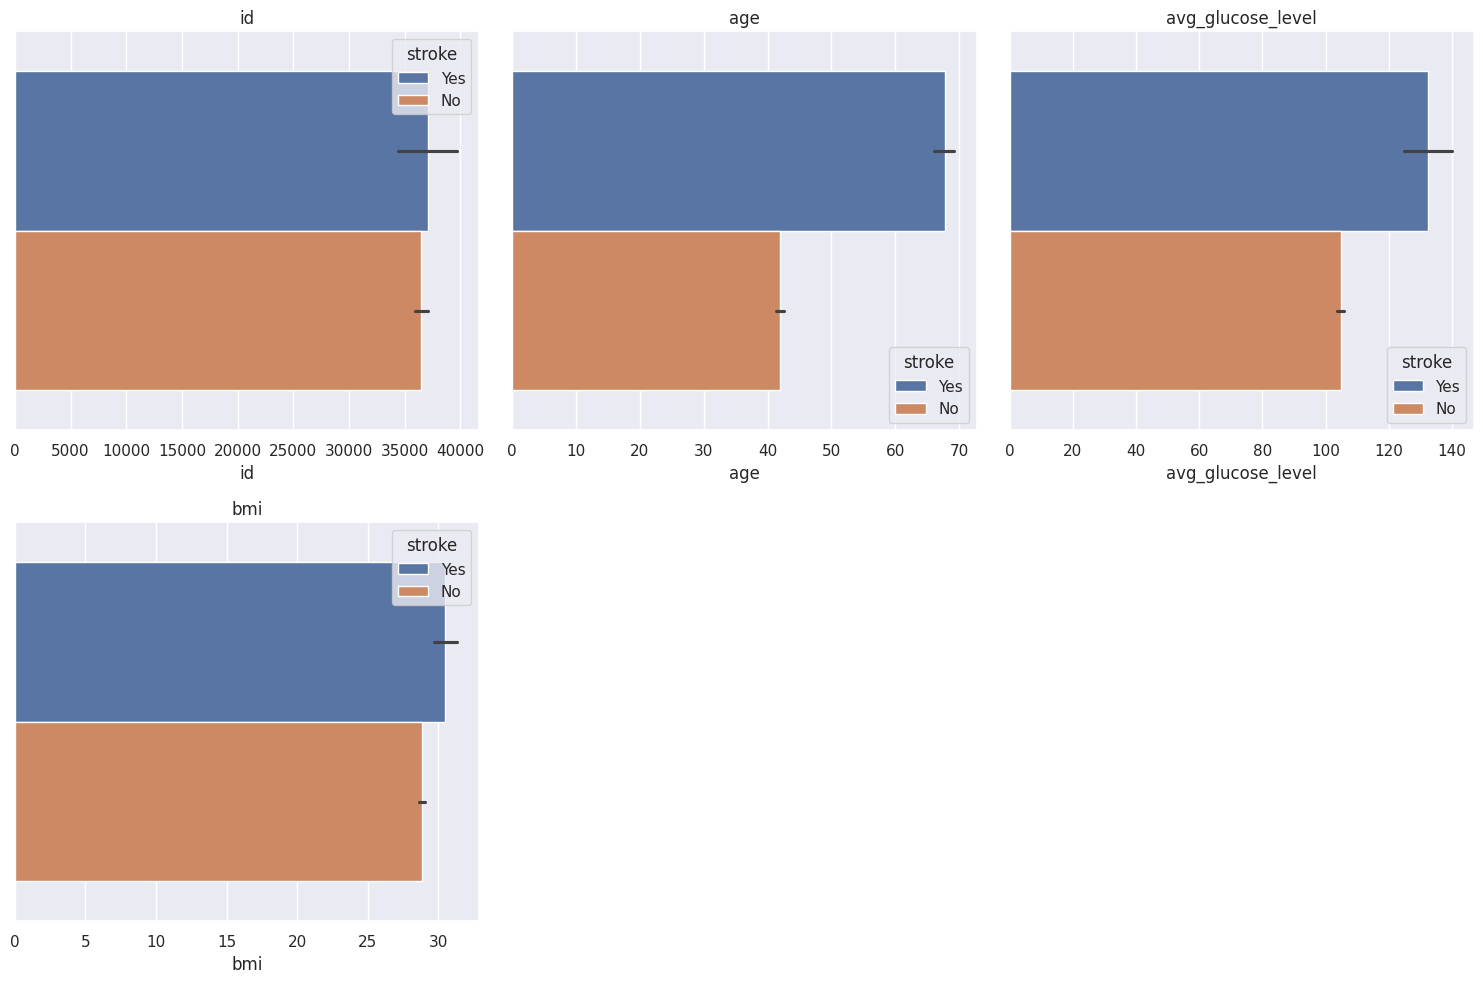

In [39]:
cat_vars=df.select_dtypes(include=['int','float']).columns.tolist()
max_categories=5

num_cols=len(cat_vars)
num_row=(num_cols + 2)//3
fig,axs=plt.subplots(nrows=num_row,ncols=3,figsize=(15,5*num_row))
axs=axs.flatten()

for i,var in enumerate(cat_vars):
  sns.barplot(x=var,hue='stroke',data=df,ax=axs[i])
  axs[i].set_title(var)

if num_cols < len(axs):
  for i in range(num_cols,len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

# Preprocessing Data Part 2

In [40]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [41]:
median_bmi=np.median(df['bmi'].dropna())
df['bmi']=df['bmi'].fillna(median_bmi)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
1,51676,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,28.1,never smoked,Yes
2,31112,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,60182,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,1665,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes


In [42]:
from sklearn.preprocessing import LabelEncoder

for i in df.select_dtypes(include='object'):
  encoder=LabelEncoder()
  df[i]=encoder.fit_transform(df[i])

In [43]:
df=df.drop(columns=['id'],axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


<Axes: >

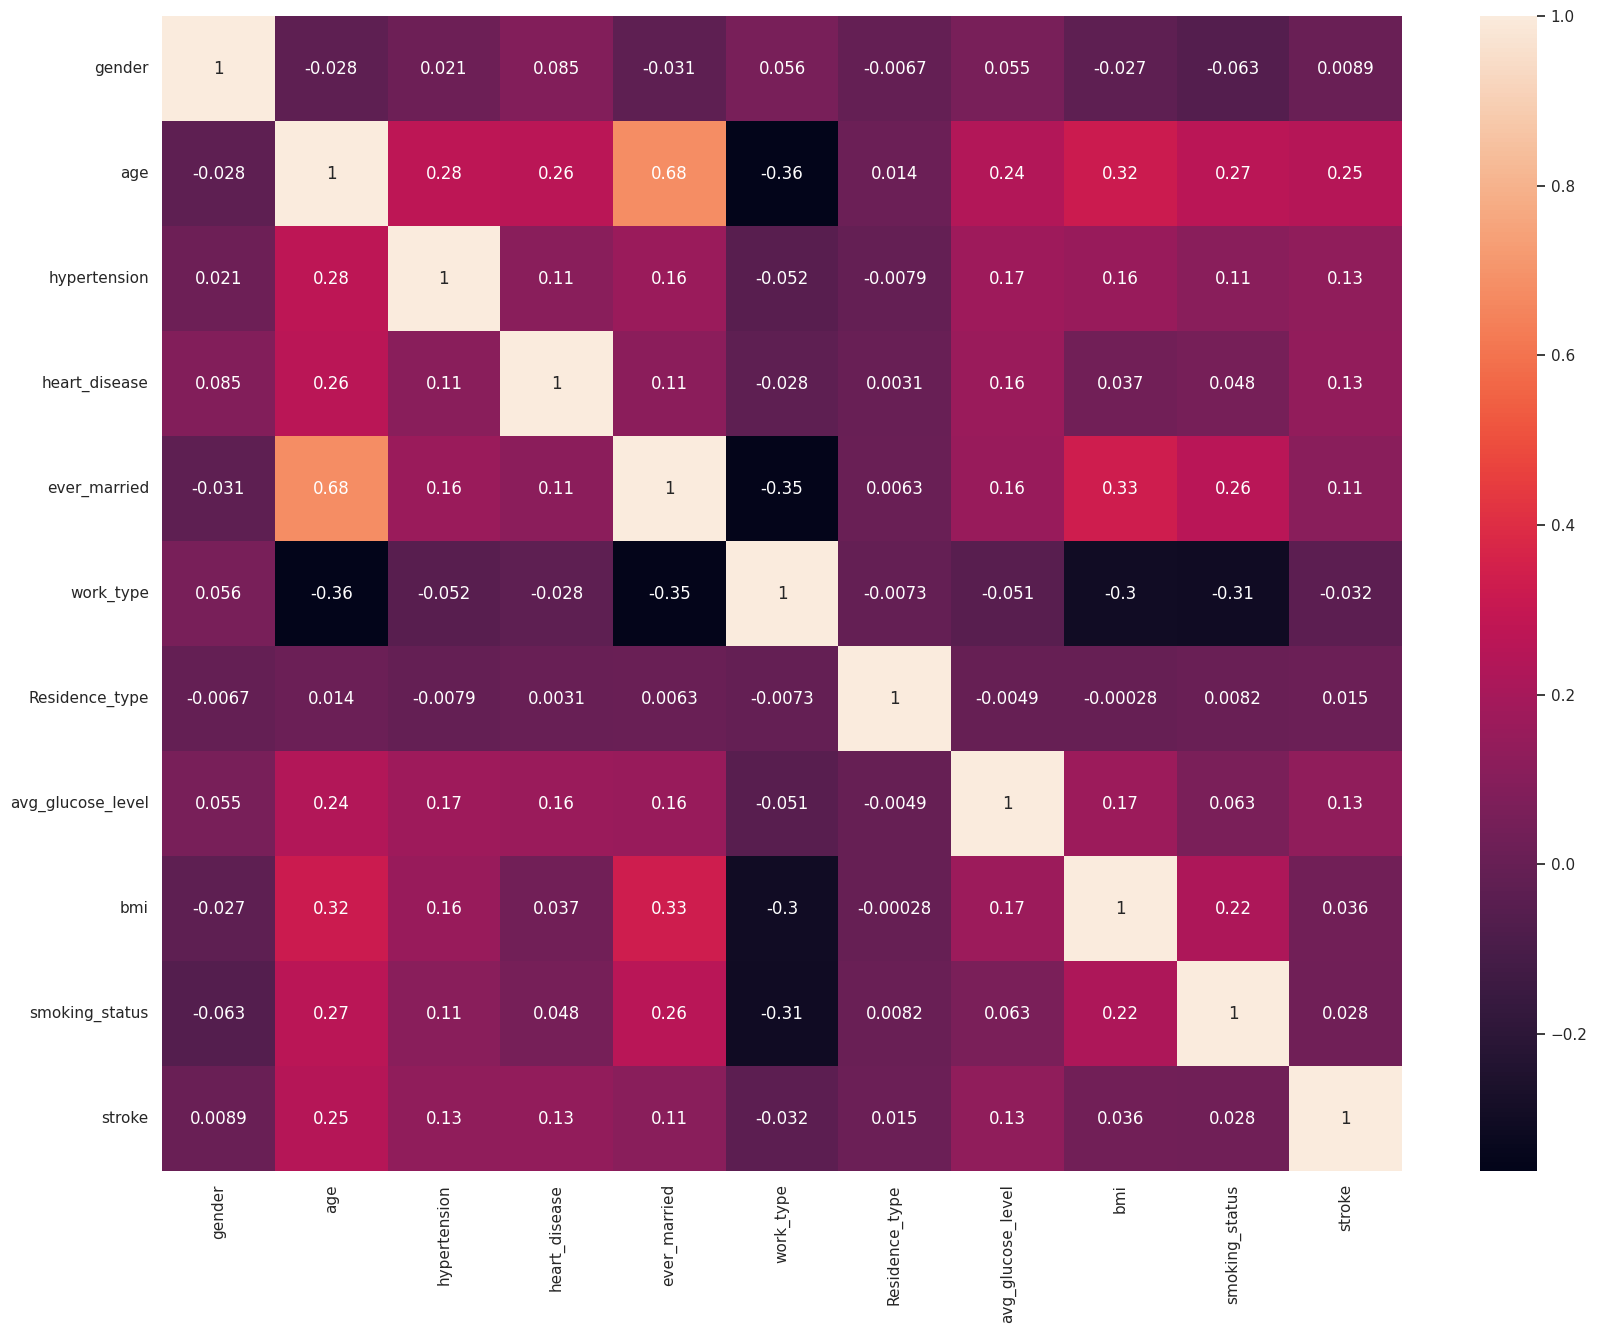

In [47]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),fmt='.2g',annot=True)

In [49]:
from scipy import stats

selected_columns=['avg_glucose_level',	'bmi']
zscores=np.abs(stats.zscore(df[selected_columns]))

theresehold=3
outlier=np.where(zscores>theresehold)[0]
df=df.drop(df.index[outlier])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


# Model Building

In [50]:
from sklearn.model_selection import train_test_split

X=df.drop(columns='stroke',axis=1)
y=df['stroke']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [51]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# rf=RandomForestClassifier()
# param_grid=({
#     'n_estimators':[100,200,50],
#     'max_depth':[2,3,5],
#     'min_samples_split':[2,3,4],
#     'min_samples_leaf':[2,3,4],
#     'random_state':[0,42]
# })
# grid=GridSearchCV(rf,param_grid,cv=5)
# grid.fit(X_train,y_train)
# print(grid.best_params_)

In [52]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_split=3,min_samples_leaf=2,random_state=100)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=3,
                       random_state=100)

In [53]:
from sklearn.metrics import accuracy_score,classification_report

y_pred=rf.predict(X_test)
print('Report:\n',classification_report(y_test,y_pred))

Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       942
           1       0.00      0.00      0.00        59

    accuracy                           0.94      1001
   macro avg       0.47      0.50      0.48      1001
weighted avg       0.89      0.94      0.91      1001



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [56]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),learning_rate=0.01,n_estimators=100,random_state=42)
ada.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.01, n_estimators=100, random_state=42)

In [57]:
from sklearn.metrics import accuracy_score,classification_report

y_pred=ada.predict(X_test)
print('Report:\n',classification_report(y_test,y_pred))

Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       942
           1       0.00      0.00      0.00        59

    accuracy                           0.94      1001
   macro avg       0.47      0.50      0.48      1001
weighted avg       0.89      0.94      0.91      1001



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [60]:
from xgboost import XGBClassifier

xgb=XGBClassifier(learning_rate=0.1,n_estimators=100,max_depth=3)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [61]:
from sklearn.metrics import accuracy_score,classification_report

y_pred=xgb.predict(X_test)
print('Report:\n',classification_report(y_test,y_pred))

Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       942
           1       0.00      0.00      0.00        59

    accuracy                           0.94      1001
   macro avg       0.47      0.50      0.48      1001
weighted avg       0.89      0.94      0.91      1001



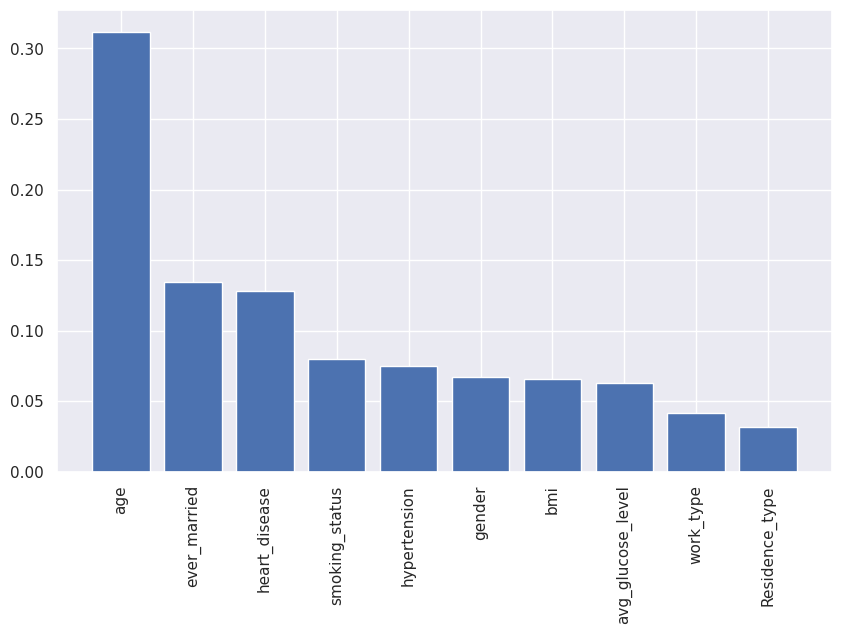

In [65]:
imp_df=pd.DataFrame({
    'kolom':X_train.columns,
    'Importance':xgb.feature_importances_
})
im1=imp_df.nlargest(10,'Importance')
plt.figure(figsize=(10,6))
plt.bar(im1['kolom'],im1['Importance'])
plt.xticks(rotation=90)
plt.show()

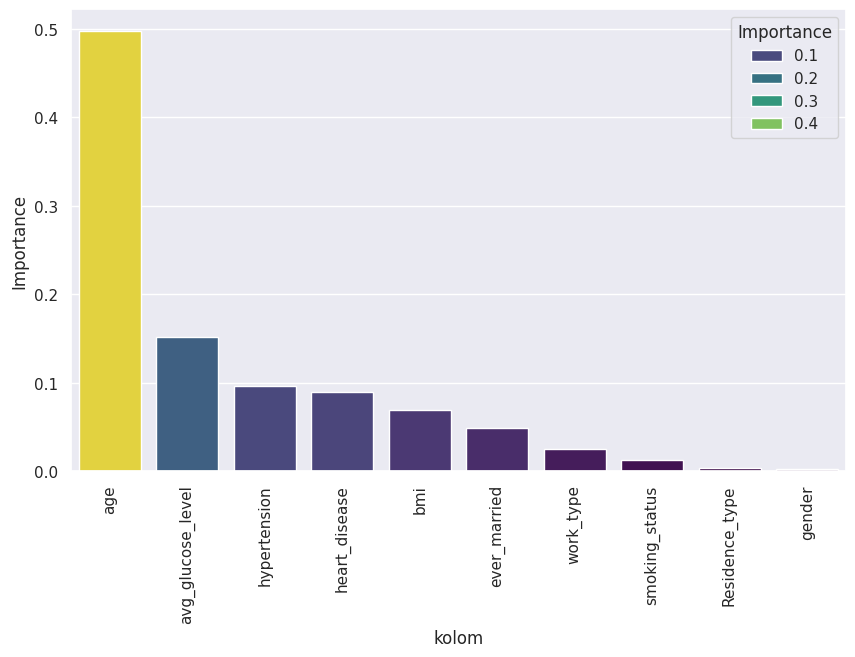

In [68]:
imp_df=pd.DataFrame({
    'kolom':X_train.columns,
    'Importance':rf.feature_importances_
})
im1=imp_df.sort_values(by='Importance',ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='kolom',y='Importance',data=im1,hue='Importance',palette='viridis')
plt.xticks(rotation=90)
plt.show()

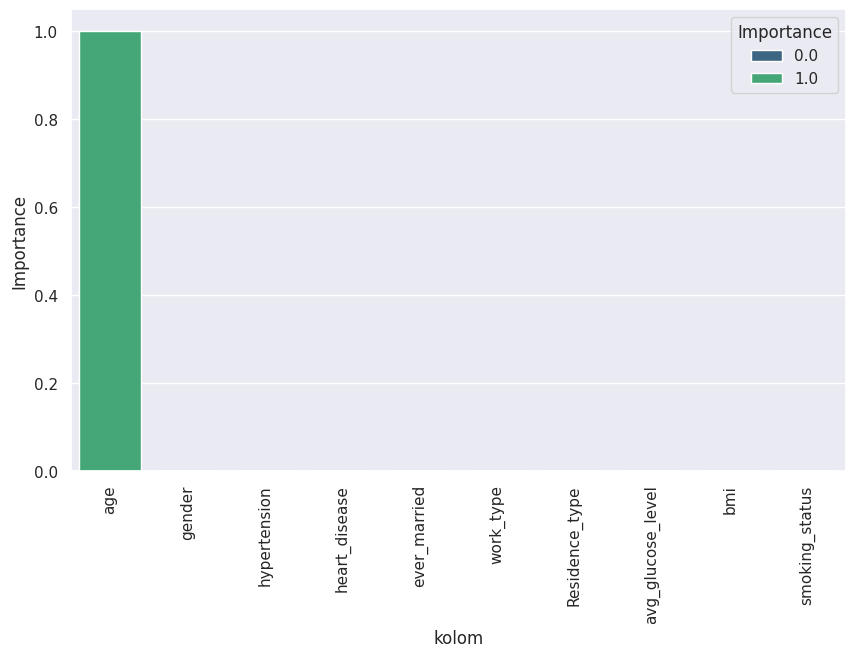

In [72]:
imp_df=pd.DataFrame({
    'kolom':X_train.columns,
    'Importance':ada.feature_importances_
})
im1=imp_df.nlargest(10,'Importance')
plt.figure(figsize=(10,6))
sns.barplot(x='kolom',y='Importance',data=im1,hue='Importance',palette='viridis')
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# scaler=MinMaxScaler()
input_user=[[0,	61.0	,0	,0	,1,	3,	0,	202.21,	28.1,	2	]]
# input_scaled=scaler.fit_transform(input_user)
pred=xgb.predict(input_user)
pred_decoded=encoder.inverse_transform(pred)
print('Prediksi Status Stroke:',pred_decoded)